# Graph log_count
### Niklas Lantau

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import os
import re

In [96]:
pdir = os.path.join(os.getcwd(), "log_data")

In [97]:
# Read logs
all_files = {}

for f in os.listdir(pdir):
    time_stamps = []
    for t in open(pdir + '/' + f):
        time_stamps.append(t.strip())
    all_files[f.replace('2021-','').replace('-','.').rstrip('.log')] = time_stamps

In [98]:
# Parse log data
x_vals = {5:[], 6:[], 7:[]}
y_vals = []

r1 = re.compile(r'(?P<one>\d+)\.(?P<two>\d+)')

for i in sorted(all_files):
    y_vals.append(len(all_files[i]))
    x_vals[int(r1.match(i).group("one"))].append((int(r1.match(i).group("two")), len(all_files[i])))


In [99]:
# Dictionary with predicted x-values
x_pred = {5:[], 6:[], 7:[]}

## May 2021

In [100]:
# Extract x- and y-values for may
x_5 = [x_vals[5][x][0] for x in range(len(x_vals[5]))]
y_5 = [x_vals[5][x][1] for x in range(len(x_vals[5]))]

# Reshape x- and y-values for Linear Regression
x_pred[5] = np.array(x_5).reshape((-1,1))
y_5 = np.array(y_5).reshape((-1,1))

# Predict model
model_5 = LinearRegression().fit(x_pred[5], y_5)
y_pred_5 = model_5.predict(x_pred[5])

## June 2021

In [101]:
# Extract x- and y-values for may
x_6 = [x_vals[6][x][0] for x in range(len(x_vals[6]))]
y_6 = [x_vals[6][x][1] for x in range(len(x_vals[6]))]

# Reshape x- and y-values for Linear Regression
x_pred[6] = np.array(x_6).reshape((-1,1))
y_6 = np.array(y_6).reshape((-1,1))

# Predict model
model_6 = LinearRegression().fit(x_pred[6], y_6)
y_pred_6 = model_6.predict(x_pred[6])

9

## Plot datapoints and regression

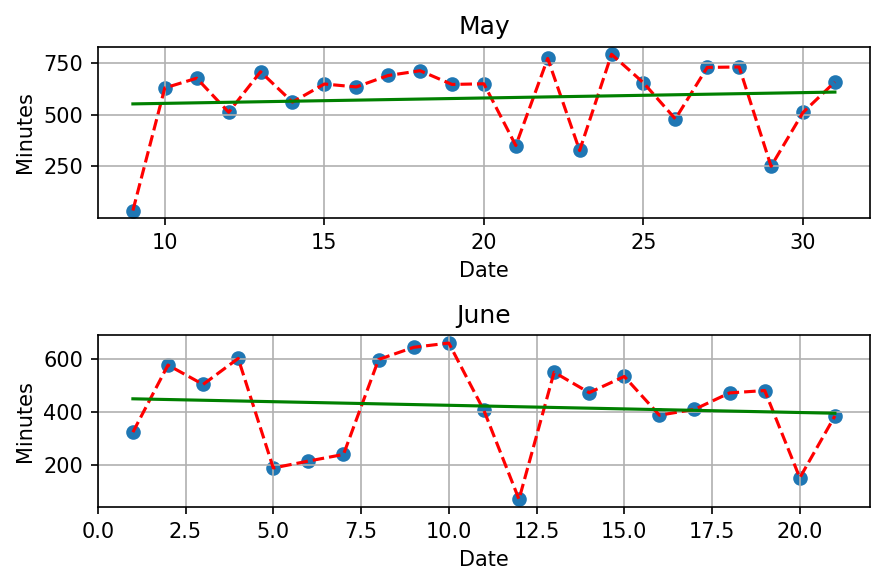

In [102]:
fig, ax = plt.subplots(2)
fig.dpi = 150

ax[0].scatter(x_5, y_5)
ax[0].plot(x_5, y_5, 'r--')
ax[0].plot(x_pred[5], y_pred_5, 'g')
ax[0].set_ylabel("Minutes")
ax[0].set_xlabel("Date")
ax[0].set_title("May")
ax[0].grid()

ax[1].scatter(x_6, y_6)
ax[1].plot(x_6, y_6, 'r--')
ax[1].plot(x_pred[6], y_pred_6, 'g')
ax[1].set_ylabel("Minutes")
ax[1].set_xlabel("Date")
ax[1].set_title("June")
ax[1].grid()


fig.tight_layout()

In [90]:
import seaborn as sns

In [94]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
